In [1]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

def euclidian_dist(a, b):
    return sum((x-y)**2 for x,y in zip(a,b))**0.5

def squared_euclidian_dist(a, b):
    return sum((x-y)**2 for x,y in zip(a,b))

def weighted_euclidian_dist(a, b, w):
    return sum((x-y)**2*z for x,y,z in zip(a,b,w))**0.5

def manhattan_dist(a, b):
    return sum(abs(x-y) for x,y in zip(a,b))

def chebyshev_dist(a, b):
    return max(abs(x-y) for x,y in zip(a,b))

points = [np.array(list(map(lambda x: 0.5-x, np.random.rand(3)))) for _ in range(4)]
weight = np.random.rand(3)

for i in range(4):
  for j in range(i+1, 4):
    a = points[i]
    b = points[j]
    print(f"ED: a: {a}, b: {b}, dist: {euclidian_dist(a,b)}")
    print(f"SED: a: {a}, b: {b}, dist: {squared_euclidian_dist(a,b)}")
    print(f"WED: a: {a}, b: {b}, dist: {weighted_euclidian_dist(a,b,weight)}")
    print(f"MD: a: {a}, b: {b}, dist: {manhattan_dist(a,b)}")
    print(f"CD: a: {a}, b: {b}, dist: {chebyshev_dist(a,b)}")


ED: a: [-0.01465241 -0.05505776 -0.23660518], b: [-0.11058776  0.07227376  0.30574779], dist: 0.565299613149566
SED: a: [-0.01465241 -0.05505776 -0.23660518], b: [-0.11058776  0.07227376  0.30574779], dist: 0.319563652627049
WED: a: [-0.01465241 -0.05505776 -0.23660518], b: [-0.11058776  0.07227376  0.30574779], dist: 0.4818544269713684
MD: a: [-0.01465241 -0.05505776 -0.23660518], b: [-0.11058776  0.07227376  0.30574779], dist: 0.7656198433469317
CD: a: [-0.01465241 -0.05505776 -0.23660518], b: [-0.11058776  0.07227376  0.30574779], dist: 0.5423529703889077
ED: a: [-0.01465241 -0.05505776 -0.23660518], b: [ 0.21641959 -0.08711282  0.20693474], dist: 0.5011481391836414
SED: a: [-0.01465241 -0.05505776 -0.23660518], b: [ 0.21641959 -0.08711282  0.20693474], dist: 0.25114945740722644
WED: a: [-0.01465241 -0.05505776 -0.23660518], b: [ 0.21641959 -0.08711282  0.20693474], dist: 0.44068984220512436
MD: a: [-0.01465241 -0.05505776 -0.23660518], b: [ 0.21641959 -0.08711282  0.20693474], dist

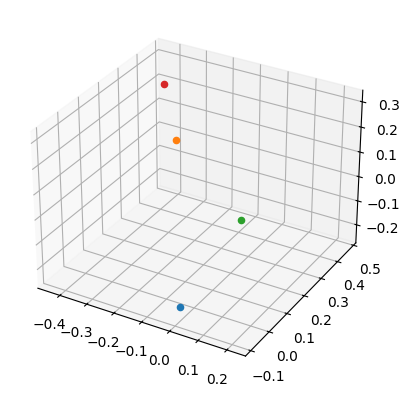

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
for p in points:
    ax.scatter(p[0], p[1], p[2])

Число соседей: 1, Accuracy: 1.0
Число соседей: 5, Accuracy: 1.0
Число соседей: 10, Accuracy: 1.0


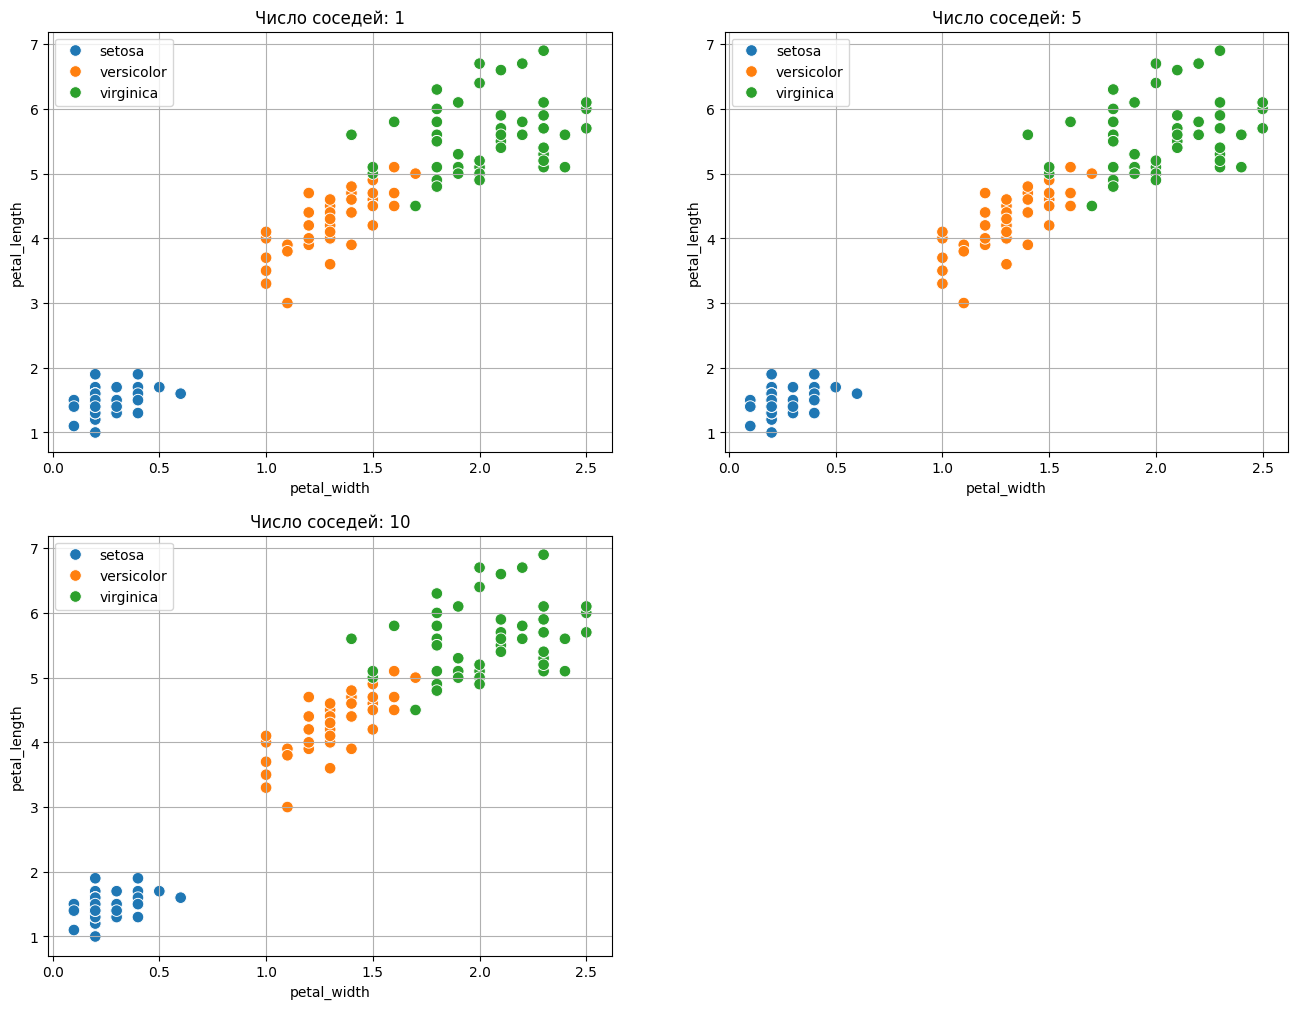

In [4]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score

iris = sns.load_dataset("iris")
train_x, test_x, train_y, test_y = train_test_split(
    iris.iloc[:, :-1], iris.iloc[:, -1], test_size=0.15)

plt.figure(figsize=(16,12))

for neighbor_num, plot_pos in zip([1, 5, 10], [1,2,3]):
  model = KNeighborsClassifier(n_neighbors=neighbor_num)
  model.fit(train_x, train_y)
  plt.subplot(220 + plot_pos)
  pred_y = model.predict(test_x)
  sns.scatterplot(x="petal_width", y="petal_length", data=iris, hue="species", s=70)
  plt.legend(loc=2)
  plt.title(f"Число соседей: {neighbor_num}")
  plt.grid()
  print(f"Число соседей: {neighbor_num}, Accuracy: {accuracy_score(test_y, pred_y) :.3}")

  for i in range(len(test_y)):
    if np.array(test_y)[i] != pred_y[i]:
      plt.scatter(test_x.iloc[i, 3], test_x.iloc[i, 2], color="red", s=150)
plt.show()

In [5]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [{"eye_color": 3, "age": 40, "height": 167, "sex": 1},
             {"age": 34, "height": 182, "sex": 2},
             {"eye_color": 1, "age": 34, "height": 155},
             {"eye_color": 2, "age": 23, "sex": 2}]

dict_vectorizer = DictVectorizer(sparse=False)
features = dict_vectorizer.fit_transform(data_dict)
features

array([[ 40.,   3., 167.,   1.],
       [ 34.,   0., 182.,   2.],
       [ 34.,   1., 155.,   0.],
       [ 23.,   2.,   0.,   2.]])